In [1]:
#importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#selecting background style
plt.rcParams['figure.figsize'] = (16,7)
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

### Reading the data

In [2]:
data = pd.read_csv('startup_funding.csv')
data.shape

(3044, 10)

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
#changing the column names
data.columns = ['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']

In [5]:
data.head()

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
#Cleaning the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "").replace("\\xe2\\x80\\x99","")

# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
data.head()

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [7]:
data.columns

Index(['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [9]:
print("The size of the data:",data.shape)

The size of the data: (3044, 10)


### Data Cleaning 

In [10]:
#importing the warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
Sno,0,0.0


In [12]:
#Checking the Remarks column

data['Remarks'].value_counts()

nan                         2625
Series A                     177
Series B                      64
Pre-Series A                  37
Series C                      28
                            ... 
Incremental Capital            1
Series B Interim Funding       1
Series E                       1
Majority Stake                 1
Valuation at $4M               1
Name: Remarks, Length: 70, dtype: int64

In [13]:
#Dropping the Remarks column as it contains lot of nans and high cardinal column

data = data.drop(['Remarks'], axis = 1)

data.columns

Index(['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [14]:
#Converting amount column to numerical so can analyze it

#function to clean AmountInUSD column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x


# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

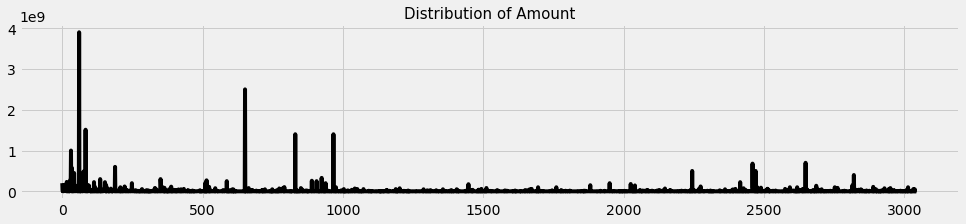

In [15]:
# lets check the snippet of AmountInUSD column after cleaning it

plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [16]:
#Cleaning the date column

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## Funding Ecosystem changes with respect to Time

In [17]:
#Date column has inconsistent values, need to clean so can analyze it


#Converting date column to datetime format
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


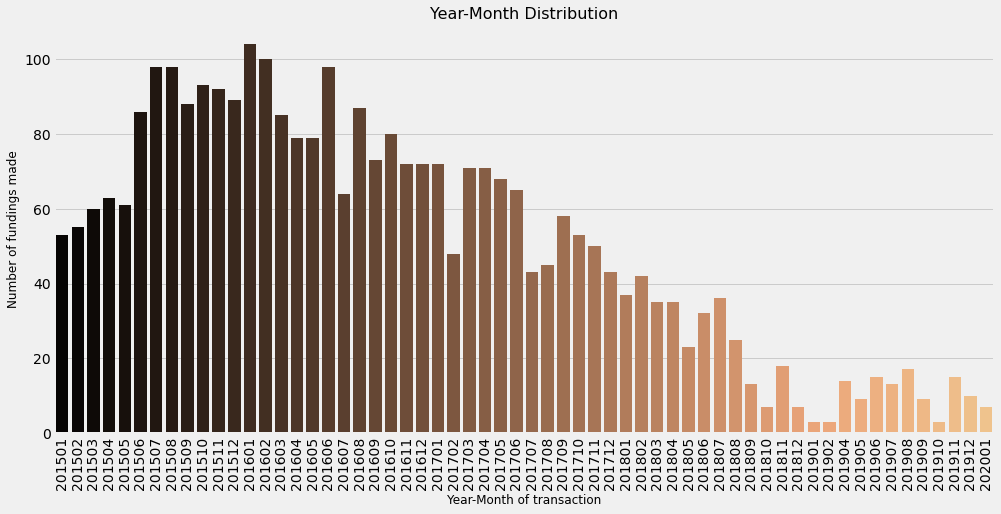

In [18]:
#Plotting the data

plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

### General amount Startups get in India

In [19]:
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [20]:
#Check startups with more than 50cr+ funding

@interact

def check(column = 'AmountInUSD', x = 500000000):
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [21]:
#Checking different ventures by Paytm

data[data.StartupName == 'Paytm']

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [23]:
#Checking different ventures by Flipkart

data[data.StartupName == 'Flipkart']

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [24]:
#Checking startup with minimum funding

print('Minimum amount funding for a startup is: ', data['AmountInUSD'].dropna().sort_values().min())

Minimum amount funding for a startup is:  -999.0


In [26]:
#Checking startups with least funding

data[['AmountInUSD', 'StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head()

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [27]:
#Checking no of rows where we replaced null values, startups having least funding

data[data['AmountInUSD'] == -999.0].shape

(971, 10)

In [28]:
#Checking the average funding amount for startups in India

print('Average amount funding for a startup is: ', data['AmountInUSD'].dropna().sort_values().mean())

Average amount funding for a startup is:  13270058.261169514


In [29]:
#Checking the total startups where funding was done

print('Total Startup Funded: ', len(data['StartupName'].unique()))

Total Startup Funded:  2457


In [30]:
#Checking the no. of funding startups got

print(data['StartupName'].value_counts().head(10))

Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
Nykaa        6
NoBroker     6
Meesho       6
Medinfi      6
Jugnoo       5
Flipkart     5
Name: StartupName, dtype: int64


In [31]:
#Checking the top 20 startups gave got maximum no. of funding

startupname = data['StartupName'].value_counts().head(20)
startupname.head(20)

Ola Cabs         8
Swiggy           8
Paytm            7
UrbanClap        6
Nykaa            6
NoBroker         6
Meesho           6
Medinfi          6
Jugnoo           5
Flipkart         5
Toppr            5
Uniphore         5
Grofers          5
Moglix           5
Capital Float    5
CarDekho         4
YepMe            4
Coverfox         4
Unacademy        4
Indus OS         4
Name: StartupName, dtype: int64

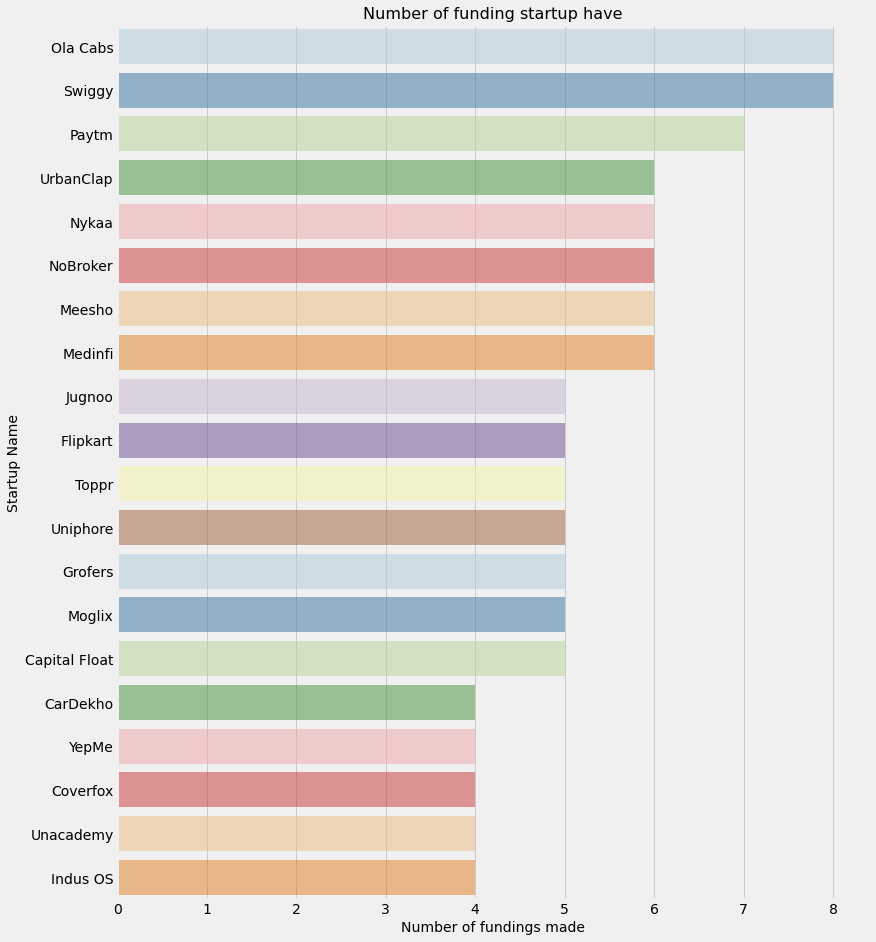

In [32]:
#Plotting the startup funding data

plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y = startupname.index, x= startupname.values, alpha= 0.5, palette= 'Paired')
plt.xticks(rotation= 'horizontal')
plt.xlabel('Number of fundings made', fontsize = 14)
plt.ylabel('Startup Name', fontsize = 14)
plt.title('Number of funding startup have', fontsize = 16)
plt.show()

## Industries more preferred for Startups

In [35]:
#Cleaning the Industry vertical column

data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

In [36]:
#Creating new dataset from IndustryVertical column
industry = data['IndustryVertical'].value_counts().head(10)

industry.head()

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Name: IndustryVertical, dtype: int64

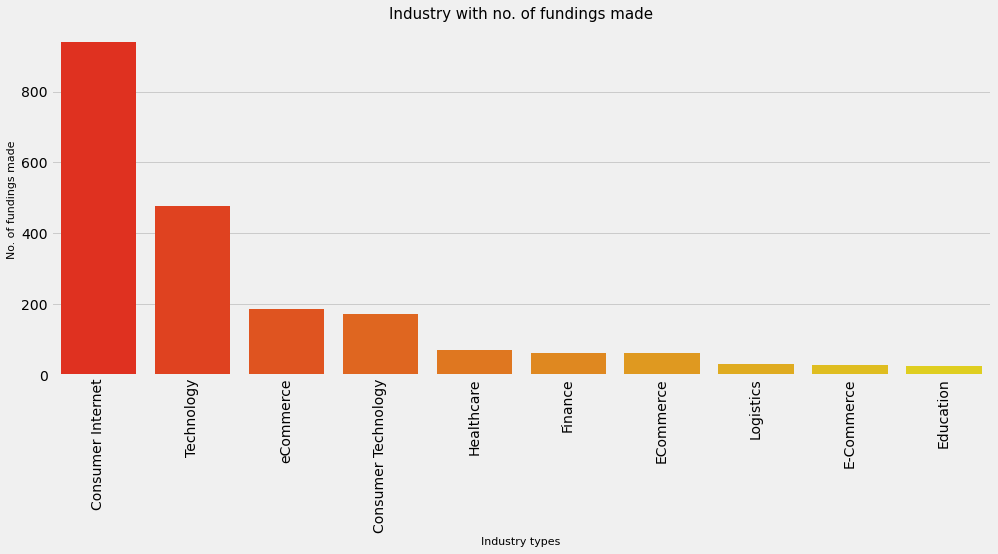

In [37]:
#Plotting the industry dataset

plt.rcParams['figure.figsize'] = (15,6)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation= 'vertical')
plt.xlabel('Industry types', fontsize = 11)
plt.ylabel('No. of fundings made', fontsize= 11)
plt.title('Industry with no. of fundings made', fontsize= 15)
plt.show()

In [38]:
#analyzing subvertical industries

subindustry = data['SubVertical'].value_counts()[1:].head(20)

subindustry

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Education Platform         5
Education                         5
Online Learning Platform          5
Online Lending                    5
Online lending platform           5
Online Food Delivery              4
Non-Banking Financial Company     4
ECommerce Marketplace             3
Agri-tech                         3
Online Gifting platform           3
Online Insurance Aggregator       3
Fitness Mobile App                3
Online Furniture Store            3
Data Analytics platform           3
E-learning                        3
Online Marketplace                3
Logistics                         3
Name: SubVertical, dtype: int64

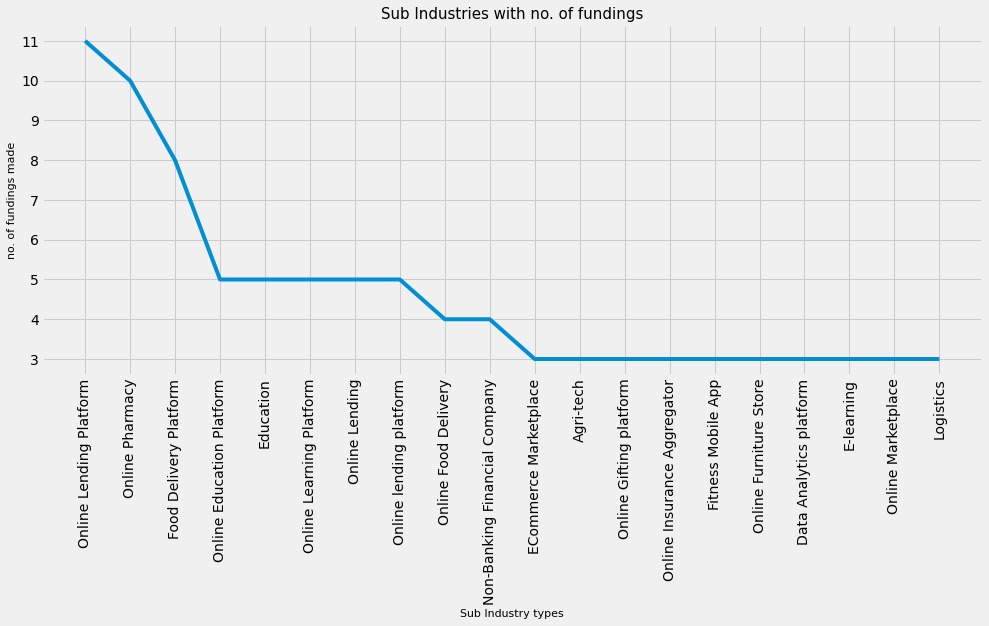

In [39]:
#Plotting the subindustry dataset

sns.lineplot(subindustry.index, subindustry.values, palette='winter')
plt.xticks(rotation= 'vertical')
plt.xlabel('Sub Industry types', fontsize= 11)
plt.ylabel('no. of fundings made', fontsize= 11)
plt.title('Sub Industries with no. of fundings', fontsize= 15)
plt.show()

## Location factor for growth of Startup

In [41]:
#analyzing the cities data

data['City'].value_counts().head(10)

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
nan          180
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Name: City, dtype: int64

In [42]:
#Cleaning the city column

data['City'] = data['City'].replace(('Bengaluru', 'nan'), ('Bangalore', 'Bangalore'))
data['City'].head()

0    Bangalore
1      Gurgaon
2    Bangalore
3    New Delhi
4       Mumbai
Name: City, dtype: object

In [43]:
#Creating city dataset

city = data['City'].value_counts().head(10)
city

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64

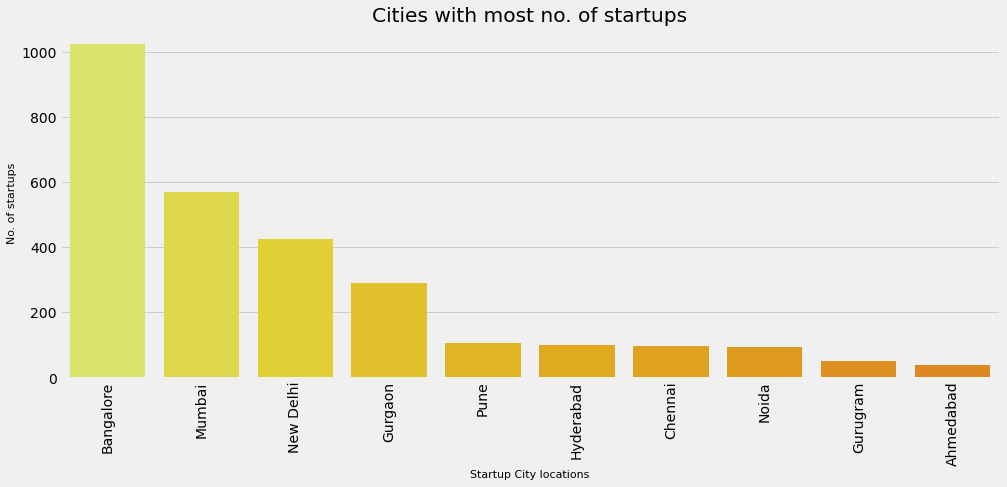

In [44]:
#Plotting the city dataset

sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation= 'vertical')
plt.xlabel('Startup City locations', fontsize= 11)
plt.ylabel('No. of startups', fontsize= 11)
plt.title('Cities with most no. of startups')
plt.show()

## Analyzing Investor fundings

In [46]:
#Cleaning the InvestorsName column

data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'


#Creating investor dataset

investors = data['InvestorsName'].value_counts().head(10)
investors

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
SAIF Partners                10
Name: InvestorsName, dtype: int64

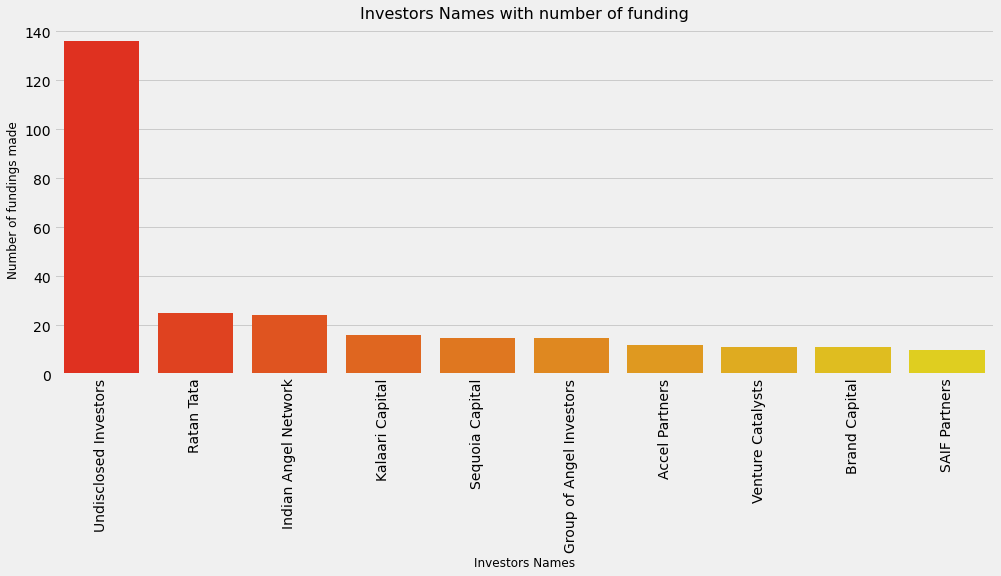

In [48]:
#Plotting investor data

sns.barplot(investors.index, investors.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## Types of funding for Startups

In [49]:
#Analyzing investment types

investment = data['InvestmentType'].value_counts().head(10)
print(investment)

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


In [50]:
#Cleaning the InvestmentType column

data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

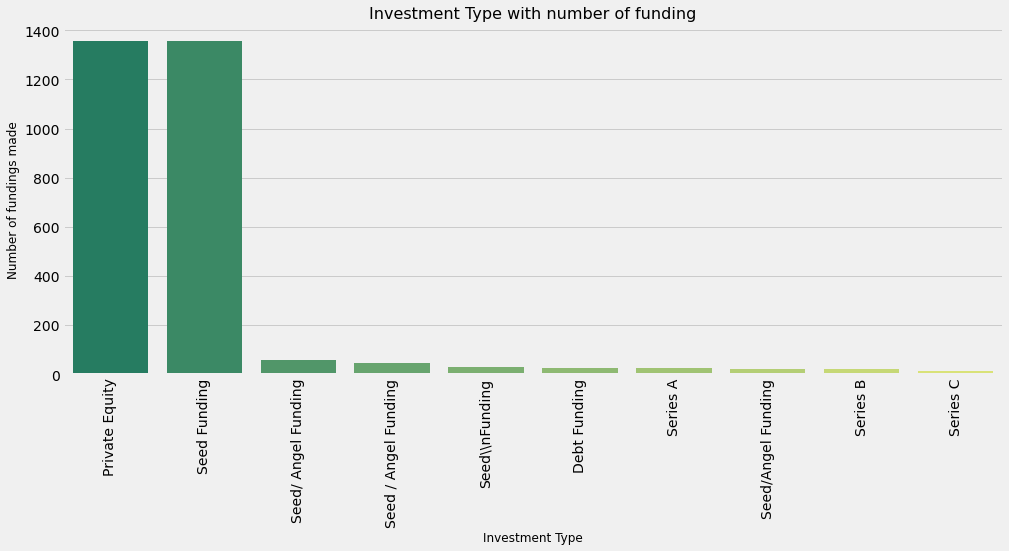

In [51]:
#Plotting the investment dataset

sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()